In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [115]:
df = pd.read_csv("dataset_completo_con_sentimientos.csv").iloc[:, 1:]
df

,Date,AAL,AAME,AAON,AAPL,AAXJ,ABCB,ABIO,ACAD,ACFN,...,XOMA,XRAY,XTLB,YNDX,YORW,ZBRA,ZEUS,ZION,ZIV,ZUMZ
0,2012-01-03 00:00:00+00:00,{'val_adj_close': 4.83},{'val_adj_close': 1.83},{'val_adj_close': 5.4},{'val_adj_close': 12.4},{'val_adj_close': 43.2},{'val_adj_close': 9.73},{'val_adj_close': 9071.92},{'val_adj_close': 1.11},{'val_adj_close': 6.41},...,{'val_adj_close': 25.0},{'val_adj_close': 33.23},{'val_adj_close': 20.5},{'val_adj_close': 19.74},{'val_adj_close': 14.5},{'val_adj_close': 35.72},{'val_adj_close': 24.44},{'val_adj_close': 13.0},{'val_adj_close': 12.71},"{'val_adj_close': 26.46, 'noticias': [{'notici..."
1,2012-01-04 00:00:00+00:00,{'val_adj_close': 4.74},{'val_adj_close': 1.82},{'val_adj_close': 5.36},{'val_adj_close': 12.47},{'val_adj_close': 42.88},{'val_adj_close': 9.54},{'val_adj_close': 8981.2},{'val_adj_close': 1.09},{'val_adj_close': 6.8},...,{'val_adj_close': 24.8},{'val_adj_close': 33.22},{'val_adj_close': 15.5},{'val_adj_close': 19.15},{'val_adj_close': 14.26},{'val_adj_close': 35.45},{'val_adj_close': 23.4},"{'val_adj_close': 13.29, 'noticias': [{'notici...",{'val_adj_close': 12.93},"{'val_adj_close': 26.33, 'noticias': [{'notici..."
2,2012-01-05 00:00:00+00:00,{'val_adj_close': 5.16},{'val_adj_close': 1.88},{'val_adj_close': 5.33},{'val_adj_close': 12.61},{'val_adj_close': 42.88},{'val_adj_close': 9.59},{'val_adj_close': 8891.38},{'val_adj_close': 1.1},{'val_adj_close': 6.62},...,"{'val_adj_close': 25.0, 'noticias': [{'noticia...",{'val_adj_close': 33.24},{'val_adj_close': 17.5},{'val_adj_close': 19.29},{'val_adj_close': 14.09},{'val_adj_close': 35.4},{'val_adj_close': 23.33},{'val_adj_close': 13.66},{'val_adj_close': 13.03},"{'val_adj_close': 30.95, 'noticias': [{'notici..."
3,2012-01-06 00:00:00+00:00,{'val_adj_close': 5.28},{'val_adj_close': 1.84},{'val_adj_close': 5.27},{'val_adj_close': 12.74},{'val_adj_close': 42.5},{'val_adj_close': 9.79},{'val_adj_close': 9253.35},{'val_adj_close': 1.15},{'val_adj_close': 6.67},...,{'val_adj_close': 25.6},{'val_adj_close': 33.05},{'val_adj_close': 17.5},{'val_adj_close': 18.61},{'val_adj_close': 14.07},{'val_adj_close': 35.11},{'val_adj_close': 22.78},"{'val_adj_close': 13.68, 'noticias': [{'notici...",{'val_adj_close': 13.18},"{'val_adj_close': 31.27, 'noticias': [{'notici..."
4,2012-01-09 00:00:00+00:00,{'val_adj_close': 5.39},{'val_adj_close': 1.87},"{'val_adj_close': 5.26, 'noticias': [{'noticia...",{'val_adj_close': 12.72},{'val_adj_close': 42.67},{'val_adj_close': 9.78},{'val_adj_close': 9163.54},{'val_adj_close': 1.19},{'val_adj_close': 6.67},...,{'val_adj_close': 27.8},{'val_adj_close': 32.89},{'val_adj_close': 18.5},{'val_adj_close': 18.73},{'val_adj_close': 13.88},{'val_adj_close': 34.95},{'val_adj_close': 22.48},{'val_adj_close': 13.87},{'val_adj_close': 13.23},{'val_adj_close': 31.78}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2255,2020-01-28 00:00:00+00:00,{'val_adj_close': 26.8},{'val_adj_close': 1.94},{'val_adj_close': 35.3},{'val_adj_close': 77.08},{'val_adj_close': 70.06},{'val_adj_close': 39.92},{'val_adj_close': 66.6},{'val_adj_close': 41.55},{'val_adj_close': 0.35},...,{'val_adj_close': 23.36},{'val_adj_close': 58.33},{'val_adj_close': 1.36},{'val_adj_close': 45.57},{'val_adj_close': 47.59},{'val_adj_close': 247.98},{'val_adj_close': 14.75},"{'val_adj_close': 39.84, 'noticias': [{'notici...",{'val_adj_close': 74.5},{'val_adj_close': 32.39}
2256,2020-01-29 00:00:00+00:00,{'val_adj_close': 26.7},{'val_adj_close': 2.01},{'val_adj_close': 35.25},{'val_adj_close': 78.7},{'val_adj_close': 70.49},{'val_adj_close': 39.4},{'val_adj_close': 66.0},{'val_adj_close': 40.24},{'val_adj_close': 0.34},...,{'val_adj_close': 23.8},{'val_adj_close': 58.18},{'val_adj_close': 1.48},{'val_adj_close': 46.11},{'val_adj_close': 47.5},{'val_adj_close': 250.17},{'val_adj_close': 14.64},{'val_adj_close': 39.23},{'val_adj_close': 74.52},"{'val_adj_close': 32.45, 'noticias': [{'notici..."
2257,2020-01-30 00:00:00+00:00,{'val_

# Variación sentimientos de noticias

In [74]:
preds_df = pd.read_csv("preds_dataset_con_sentimientos.csv").iloc[:, 1:]
preds_df

,idx,text,pred
0,"[((0, 38), 0), ((0, 565), 0)]",'Mad Money Lightning Round': Stay Long Sandridge,negative
1,"[((0, 38), 1), ((0, 565), 1)]",Cramer's 'Mad Money' Recap: Betting Against th...,positive
2,"[((0, 133), 0)]",BioLineRx Announces Initiation of CE Mark Regi...,neutral
3,"[((0, 267), 0)]",Hearing Rumors of the Death of Fidel Castro,positive
4,"[((0, 267), 1)]",UPDATE: Reports of the Death of Former Cuban P...,positive
...,...,...,...
2090589,"[((2259, 1118), 0)]",Western Digital shares are trading higher afte...,neutral
2090590,"[((2259, 1118), 1)]",Argus Research Maintains Buy on Western Digita...,neutral
2090591,"[((2259, 1118), 2)]",Quantum to Acquire the ActiveScale Division of...,neutral
2090592,"[((2259, 1138), 0)]","Woodward Q1 EPS $1.1 Beats $1.02 Estimate, Sal...",neutral


In [75]:
preds_df = preds_df[preds_df["pred"]!="none"].reset_index().iloc[:, 1:]

In [76]:
preds_df["pred"] = preds_df["pred"].where(preds_df["pred"] != "negative", "-1")
preds_df["pred"] = preds_df["pred"].where(preds_df["pred"] != "positive", "1")
preds_df["pred"] = preds_df["pred"].where(preds_df["pred"] != "neutral", "0")
preds_df["pred"] = preds_df["pred"].astype("int8")

In [77]:
preds_df

,idx,text,pred
0,"[((0, 38), 0), ((0, 565), 0)]",'Mad Money Lightning Round': Stay Long Sandridge,-1
1,"[((0, 38), 1), ((0, 565), 1)]",Cramer's 'Mad Money' Recap: Betting Against th...,1
2,"[((0, 133), 0)]",BioLineRx Announces Initiation of CE Mark Regi...,0
3,"[((0, 267), 0)]",Hearing Rumors of the Death of Fidel Castro,1
4,"[((0, 267), 1)]",UPDATE: Reports of the Death of Former Cuban P...,1
...,...,...,...
2090046,"[((2259, 1118), 0)]",Western Digital shares are trading higher afte...,0
2090047,"[((2259, 1118), 1)]",Argus Research Maintains Buy on Western Digita...,0
2090048,"[((2259, 1118), 2)]",Quantum to Acquire the ActiveScale Division of...,0
2090049,"[((2259, 1138), 0)]","Woodward Q1 EPS $1.1 Beats $1.02 Estimate, Sal...",0


In [78]:
preds_df["pred"].unique()

array([-1,  1,  0], dtype=int8)

In [79]:
preds_df["pred"][0]

-1

In [80]:
timeseries_df = {"Date": [], "value": []}

for i, row in preds_df.iterrows():
    if i%10000==0:
        print(i)
    for idx in eval(row["idx"]):
        timeseries_df["Date"].append(df["Date"][idx[0][0]])
        timeseries_df["value"].append(row["pred"])

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
13

In [81]:
print(len(timeseries_df["Date"]))
print(len(timeseries_df["value"]))

2240578
2240578


In [82]:
timeseries_df = pd.DataFrame(timeseries_df)
timeseries_df

,Date,value
0,2012-01-03 00:00:00+00:00,-1
1,2012-01-03 00:00:00+00:00,-1
2,2012-01-03 00:00:00+00:00,1
3,2012-01-03 00:00:00+00:00,1
4,2012-01-03 00:00:00+00:00,0
...,...,...
2240573,2020-02-03 00:00:00+00:00,0
2240574,2020-02-03 00:00:00+00:00,0
2240575,2020-02-03 00:00:00+00:00,0
2240576,2020-02-03 00:00:00+00:00,0


In [83]:
timeseries_df["Date"] = pd.to_datetime(timeseries_df["Date"])
timeseries_df

,Date,value
0,2012-01-03 00:00:00+00:00,-1
1,2012-01-03 00:00:00+00:00,-1
2,2012-01-03 00:00:00+00:00,1
3,2012-01-03 00:00:00+00:00,1
4,2012-01-03 00:00:00+00:00,0
...,...,...
2240573,2020-02-03 00:00:00+00:00,0
2240574,2020-02-03 00:00:00+00:00,0
2240575,2020-02-03 00:00:00+00:00,0
2240576,2020-02-03 00:00:00+00:00,0


In [84]:
timeseries_df = timeseries_df.groupby(["Date"]).sum()

In [85]:
timeseries_df = timeseries_df.sort_values(by=["Date"])

In [86]:
timeseries_df = timeseries_df.reset_index()

In [87]:
timeseries_df.to_csv("timeseries_dataset_to_plot.csv")

In [88]:
timeseries_df["Date"].dtype

datetime64[ns, UTC]

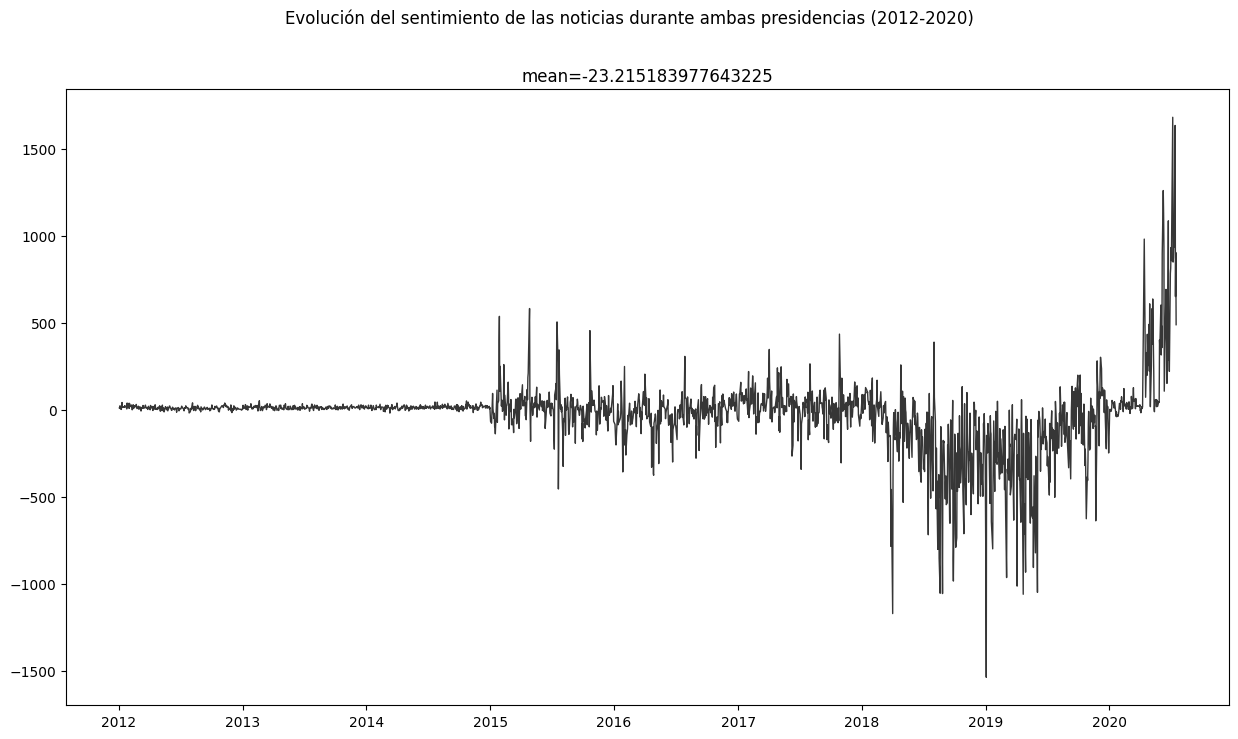

In [89]:
plt.figure(figsize=(15,8))
plt.suptitle("Evolución del sentimiento de las noticias durante ambas presidencias (2012-2020)")
plt.title(f"mean={timeseries_df['value'].mean()}")
plt.plot(timeseries_df["Date"], timeseries_df["value"], color="#363636", linewidth=1)
plt.savefig("plot_evolucion_sentimientos.png")

In [90]:
timeseries_df_obama = timeseries_df[timeseries_df['Date'].dt.date < pd.Timestamp('2017-01-20').date()]
timeseries_df_obama

,Date,value
0,2012-01-03 00:00:00+00:00,10
1,2012-01-04 00:00:00+00:00,9
2,2012-01-05 00:00:00+00:00,22
3,2012-01-06 00:00:00+00:00,6
4,2012-01-09 00:00:00+00:00,1
...,...,...
1265,2017-01-12 00:00:00+00:00,56
1266,2017-01-13 00:00:00+00:00,97
1267,2017-01-17 00:00:00+00:00,33
1268,2017-01-18 00:00:00+00:00,54


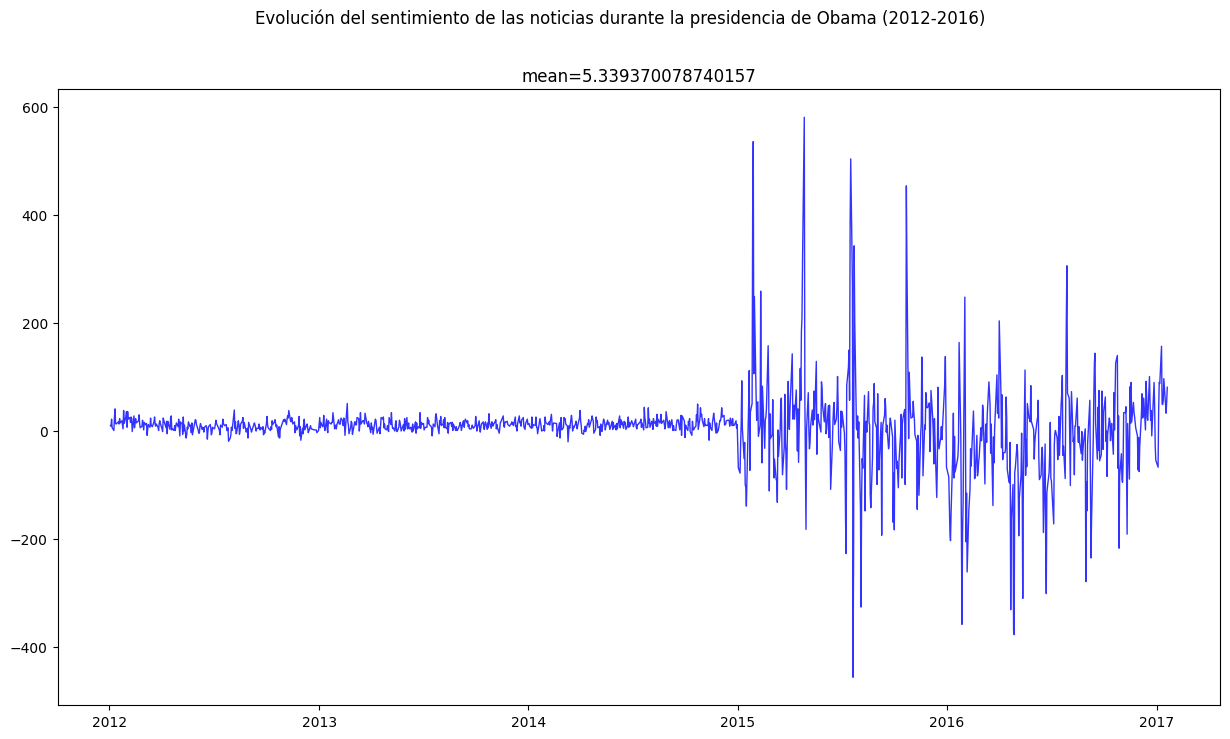

In [91]:
plt.figure(figsize=(15,8))
plt.suptitle("Evolución del sentimiento de las noticias durante la presidencia de Obama (2012-2016)")
plt.title(f"mean={timeseries_df_obama['value'].mean()}")
plt.plot(timeseries_df_obama["Date"], timeseries_df_obama["value"], color="#3333FF", linewidth=1)
plt.savefig("plot_evolucion_sentimientos_obama.png")

In [92]:
timeseries_df_trump = timeseries_df[timeseries_df['Date'].dt.date >= pd.Timestamp('2017-01-20').date()]
timeseries_df_trump

,Date,value
1270,2017-01-20 00:00:00+00:00,36
1271,2017-01-23 00:00:00+00:00,63
1272,2017-01-24 00:00:00+00:00,75
1273,2017-01-25 00:00:00+00:00,119
1274,2017-01-26 00:00:00+00:00,56
...,...,...
2142,2020-07-10 00:00:00+00:00,935
2143,2020-07-13 00:00:00+00:00,1633
2144,2020-07-14 00:00:00+00:00,650
2145,2020-07-15 00:00:00+00:00,903


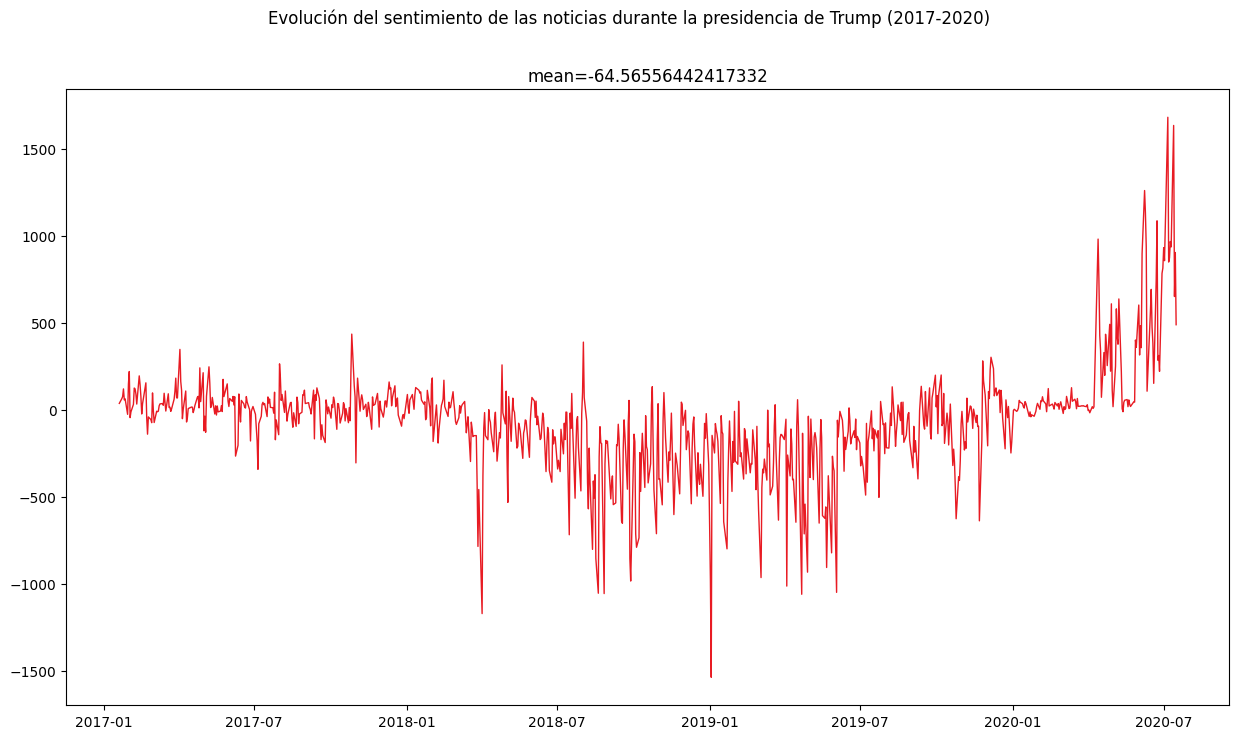

In [93]:
plt.figure(figsize=(15,8))
plt.suptitle("Evolución del sentimiento de las noticias durante la presidencia de Trump (2017-2020)")
plt.title(f"mean={timeseries_df_trump['value'].mean()}")
plt.plot(timeseries_df_trump["Date"], timeseries_df_trump["value"], color="#E81B23", linewidth=1)
plt.savefig("plot_evolucion_sentimientos_trump.png")

# Variación datos de bolsa

In [116]:
for col in df.iloc[:, 1:]:
    df[col] = df[col].apply(lambda x: list(eval(x).values())[0])
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Date"]).reset_index().iloc[:, 1:]
df

,Date,AAL,AAME,AAON,AAPL,AAXJ,ABCB,ABIO,ACAD,ACFN,...,XOMA,XRAY,XTLB,YNDX,YORW,ZBRA,ZEUS,ZION,ZIV,ZUMZ
0,2012-01-03 00:00:00+00:00,4.83,1.83,5.40,12.40,43.20,9.73,9071.92,1.11,6.41,...,25.00,33.23,20.50,19.74,14.50,35.72,24.44,13.00,12.71,26.46
1,2012-01-04 00:00:00+00:00,4.74,1.82,5.36,12.47,42.88,9.54,8981.20,1.09,6.80,...,24.80,33.22,15.50,19.15,14.26,35.45,23.40,13.29,12.93,26.33
2,2012-01-05 00:00:00+00:00,5.16,1.88,5.33,12.61,42.88,9.59,8891.38,1.10,6.62,...,25.00,33.24,17.50,19.29,14.09,35.40,23.33,13.66,13.03,30.95
3,2012-01-06 00:00:00+00:00,5.28,1.84,5.27,12.74,42.50,9.79,9253.35,1.15,6.67,...,25.60,33.05,17.50,18.61,14.07,35.11,22.78,13.68,13.18,31.27
4,2012-01-09 00:00:00+00:00,5.39,1.87,5.26,12.72,42.67,9.78,9163.54,1.19,6.67,...,27.80,32.89,18.50,18.73,13.88,34.95,22.48,13.87,13.23,31.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2255,2020-12-17 00:00:00+00:00,16.80,2.22,43.04,125.99,87.81,38.21,48.96,55.21,0.40,...,41.44,52.99,2.86,70.65,47.11,375.43,15.18,36.77,28.90,38.41
2256,2020-12-18 00:00:00+00:00,16.51,2.07,42.70,123.99,87.59,37.43,48.00,55.25,0.41,...,45.56,52.32,2.88,69.27,46.68,373.00,13.93,36.07,28.90,37.91
2257,2020-12-21 00:00:00+00:00,16.10,2.10,42.64,125.53,86.65,36.31,51.24,56.69,0.39,...,45.61,52.16,2.83,67.09,45.46,375.91,13.45,37.26,28.90,36.63
2258,2020-12-22 00:00:00+00:00,15.48,2.09,42.70,129.10,85.98,35.61,53.16,55.59,0.43,...,45.44,51.54,2.66,67.11,45.71,379.96,13.13,36.91,28.90,36.36


In [117]:
# df_vars_pct = df.iloc[1:, 1:].reset_index().iloc[:, 1:]
# for i, row in df_vars_pct.iterrows():
#     if i%200 == 0:
#         print(i, len(df)-1)
#     for j, col in enumerate(row):
#         if df.iloc[i, j+1] == 0.0:
#             if row.iloc[j] == 0.0:
#                 df_vars_pct.iloc[i, j] = 0.0
#             else:
#                 df_vars_pct.iloc[i, j] = 1.0
#         else:
#             df_vars_pct.iloc[i, j] = row.iloc[j] / df.iloc[i, j+1] - 1

# df_vars_pct.to_csv("df_vars_pct.csv")

df_vars_pct = pd.read_csv("df_vars_pct.csv").iloc[:, 1:]
for col in df_vars_pct:
    if col != "Date":
        df_vars_pct[col] = df_vars_pct[col].astype("float64")
    else:
        df_vars_pct[col] = pd.to_datetime(df_vars_pct[col])
        
df_vars_pct

,AAL,AAME,AAON,AAPL,AAXJ,ABCB,ABIO,ACAD,ACFN,ACGL,...,XOMA,XRAY,XTLB,YNDX,YORW,ZBRA,ZEUS,ZION,ZIV,ZUMZ
0,-0.018634,-0.005464,-0.007407,0.005645,-0.007407,-0.019527,-0.010000,-0.018018,0.060842,-0.017614,...,-0.008000,-0.000301,-0.243902,-0.029889,-0.016552,-0.007559,-0.042553,0.022308,0.017309,-0.004913
1,0.088608,0.032967,-0.005597,0.011227,0.000000,0.005241,-0.010001,0.009174,-0.026471,0.018745,...,0.008065,0.000602,0.129032,0.007311,-0.011921,-0.001410,-0.002991,0.027840,0.007734,0.175465
2,0.023256,-0.021277,-0.011257,0.010309,-0.008862,0.020855,0.040710,0.045455,0.007553,-0.000800,...,0.024000,-0.005716,0.000000,-0.035251,-0.001419,-0.008192,-0.023575,0.001464,0.011512,0.010339
3,0.020833,0.016304,-0.001898,-0.001570,0.004000,-0.001021,-0.009706,0.034783,0.000000,-0.007206,...,0.085938,-0.004841,0.057143,0.006448,-0.013504,-0.004557,-0.013169,0.013889,0.003794,0.016310
4,0.000000,0.000000,0.011407,0.003145,0.025076,0.002045,-0.009998,0.075630,-0.007496,0.006452,...,0.014388,0.014290,0.000000,0.006941,0.018012,0.009156,-0.005338,0.015862,0.006047,-0.001573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,-0.003559,-0.026316,0.031145,0.006953,0.006418,0.001310,-0.009709,0.040128,0.052632,0.004237,...,0.032130,0.002080,0.025090,-0.002119,0.001701,-0.005246,-0.047081,0.000000,0.000000,0.019915
2255,-0.017262,-0.067568,-0.007900,-0.015874,-0.002505,-0.020414,-0.019608,0.000725,0.025000,-0.031505,...,0.099421,-0.012644,0.006993,-0.019533,-0.009128,-0.006473,-0.082345,-0.019037,0.000000,-0.013017
2256,-0.024833,0.014493,-0.001405,0.012420,-0.010732,-0.029923,0.067500,0.026063,-0.048780,-0.001743,...,0.001097,-0.003058,-0.017361,-0.031471,-0.026135,0.007802,-0.034458,0.032991,0.000000,-0.033764
2257,-0.038509,-0.004762,0.001407,0.028439,-0.007732,-0.019278,0.037471,-0.019404,0.102564,0.006110,...,-0.003727,-0.011887,-0.060071,0.000298,0.005499,0.010774,-0.023792,-0.009393,0.000000,-0.007371


In [118]:
df_vars_pct["Date"] = df.iloc[1:, 0].reset_index().iloc[:, 1]
df_vars_pct = df_vars_pct.sort_values(["Date"]).reset_index().iloc[:, 1:]
df_vars_pct

C:\Users\sergi\AppData\Local\Temp\ipykernel_5184\32933450.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_vars_pct["Date"] = df.iloc[1:, 0].reset_index().iloc[:, 1]


,AAL,AAME,AAON,AAPL,AAXJ,ABCB,ABIO,ACAD,ACFN,ACGL,...,XRAY,XTLB,YNDX,YORW,ZBRA,ZEUS,ZION,ZIV,ZUMZ,Date
0,-0.018634,-0.005464,-0.007407,0.005645,-0.007407,-0.019527,-0.010000,-0.018018,0.060842,-0.017614,...,-0.000301,-0.243902,-0.029889,-0.016552,-0.007559,-0.042553,0.022308,0.017309,-0.004913,2012-01-04 00:00:00+00:00
1,0.088608,0.032967,-0.005597,0.011227,0.000000,0.005241,-0.010001,0.009174,-0.026471,0.018745,...,0.000602,0.129032,0.007311,-0.011921,-0.001410,-0.002991,0.027840,0.007734,0.175465,2012-01-05 00:00:00+00:00
2,0.023256,-0.021277,-0.011257,0.010309,-0.008862,0.020855,0.040710,0.045455,0.007553,-0.000800,...,-0.005716,0.000000,-0.035251,-0.001419,-0.008192,-0.023575,0.001464,0.011512,0.010339,2012-01-06 00:00:00+00:00
3,0.020833,0.016304,-0.001898,-0.001570,0.004000,-0.001021,-0.009706,0.034783,0.000000,-0.007206,...,-0.004841,0.057143,0.006448,-0.013504,-0.004557,-0.013169,0.013889,0.003794,0.016310,2012-01-09 00:00:00+00:00
4,0.000000,0.000000,0.011407,0.003145,0.025076,0.002045,-0.009998,0.075630,-0.007496,0.006452,...,0.014290,0.000000,0.006941,0.018012,0.009156,-0.005338,0.015862,0.006047,-0.001573,2012-01-10 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,-0.003559,-0.026316,0.031145,0.006953,0.006418,0.001310,-0.009709,0.040128,0.052632,0.004237,...,0.002080,0.025090,-0.002119,0.001701,-0.005246,-0.047081,0.000000,0.000000,0.019915,2020-12-17 00:00:00+00:00
2255,-0.017262,-0.067568,-0.007900,-0.015874,-0.002505,-0.020414,-0.019608,0.000725,0.025000,-0.031505,...,-0.012644,0.006993,-0.019533,-0.009128,-0.006473,-0.082345,-0.019037,0.000000,-0.013017,2020-12-18 00:00:00+00:00
2256,-0.024833,0.014493,-0.001405,0.012420,-0.010732,-0.029923,0.067500,0.026063,-0.048780,-0.001743,...,-0.003058,-0.017361,-0.031471,-0.026135,0.007802,-0.034458,0.032991,0.000000,-0.033764,2020-12-21 00:00:00+00:00
2257,-0.038509,-0.004762,0.001407,0.028439,-0.007732,-0.019278,0.037471,-0.019404,0.102564,0.006110,...,-0.011887,-0.060071,0.000298,0.005499,0.010774,-0.023792,-0.009393,0.000000,-0.007371,2020-12-22 00:00:00+00:00


In [119]:
dict_vars_pct = {"Date": [], "value": []}
for i, row in df_vars_pct.iterrows():
    for j, col in enumerate(row.iloc[:-1]):
        dict_vars_pct["value"].append(col)
        dict_vars_pct["Date"].append(row.iloc[-1])

In [120]:
df_vars_pct_plot = pd.DataFrame(dict_vars_pct)
df_vars_pct_plot["value"] = df_vars_pct_plot["value"].astype("float64")
df_vars_pct_plot["Date"] = pd.to_datetime(df_vars_pct_plot["Date"])
df_vars_pct_plot = df_vars_pct_plot.groupby(["Date"]).mean().sort_values(by=["Date"]).reset_index()
df_vars_sum_plot.to_csv("df_vars_pct_plot.csv")
df_vars_pct_plot

,Date,value
0,2012-01-04 00:00:00+00:00,-0.003076
1,2012-01-05 00:00:00+00:00,0.006831
2,2012-01-06 00:00:00+00:00,0.002642
3,2012-01-09 00:00:00+00:00,0.004490
4,2012-01-10 00:00:00+00:00,0.014027
...,...,...
2254,2020-12-17 00:00:00+00:00,0.009502
2255,2020-12-18 00:00:00+00:00,-0.002880
2256,2020-12-21 00:00:00+00:00,-0.002366
2257,2020-12-22 00:00:00+00:00,0.004848


In [121]:
bolsa_obama_pct = df_vars_pct_plot[df_vars_pct_plot['Date'].dt.date < pd.Timestamp('2017-01-20').date()]
bolsa_obama_pct

,Date,value
0,2012-01-04 00:00:00+00:00,-0.003076
1,2012-01-05 00:00:00+00:00,0.006831
2,2012-01-06 00:00:00+00:00,0.002642
3,2012-01-09 00:00:00+00:00,0.004490
4,2012-01-10 00:00:00+00:00,0.014027
...,...,...
1264,2017-01-12 00:00:00+00:00,-0.008322
1265,2017-01-13 00:00:00+00:00,0.008748
1266,2017-01-17 00:00:00+00:00,-0.011504
1267,2017-01-18 00:00:00+00:00,0.003739


In [122]:
bolsa_trump_pct = df_vars_pct_plot[df_vars_pct_plot['Date'].dt.date >= pd.Timestamp('2017-01-20').date()]
bolsa_trump_pct

,Date,value
1269,2017-01-20 00:00:00+00:00,0.004845
1270,2017-01-23 00:00:00+00:00,-0.005016
1271,2017-01-24 00:00:00+00:00,0.012906
1272,2017-01-25 00:00:00+00:00,0.008501
1273,2017-01-26 00:00:00+00:00,-0.003380
...,...,...
2254,2020-12-17 00:00:00+00:00,0.009502
2255,2020-12-18 00:00:00+00:00,-0.002880
2256,2020-12-21 00:00:00+00:00,-0.002366
2257,2020-12-22 00:00:00+00:00,0.004848


In [123]:
figs_size = (20, 10)
pcts_ylim = (-0.11, 0.09)
medias_y_varianzas_dict = {"Total": [], "Obama": [], "Trump": [], "Trump sin COVID": []}

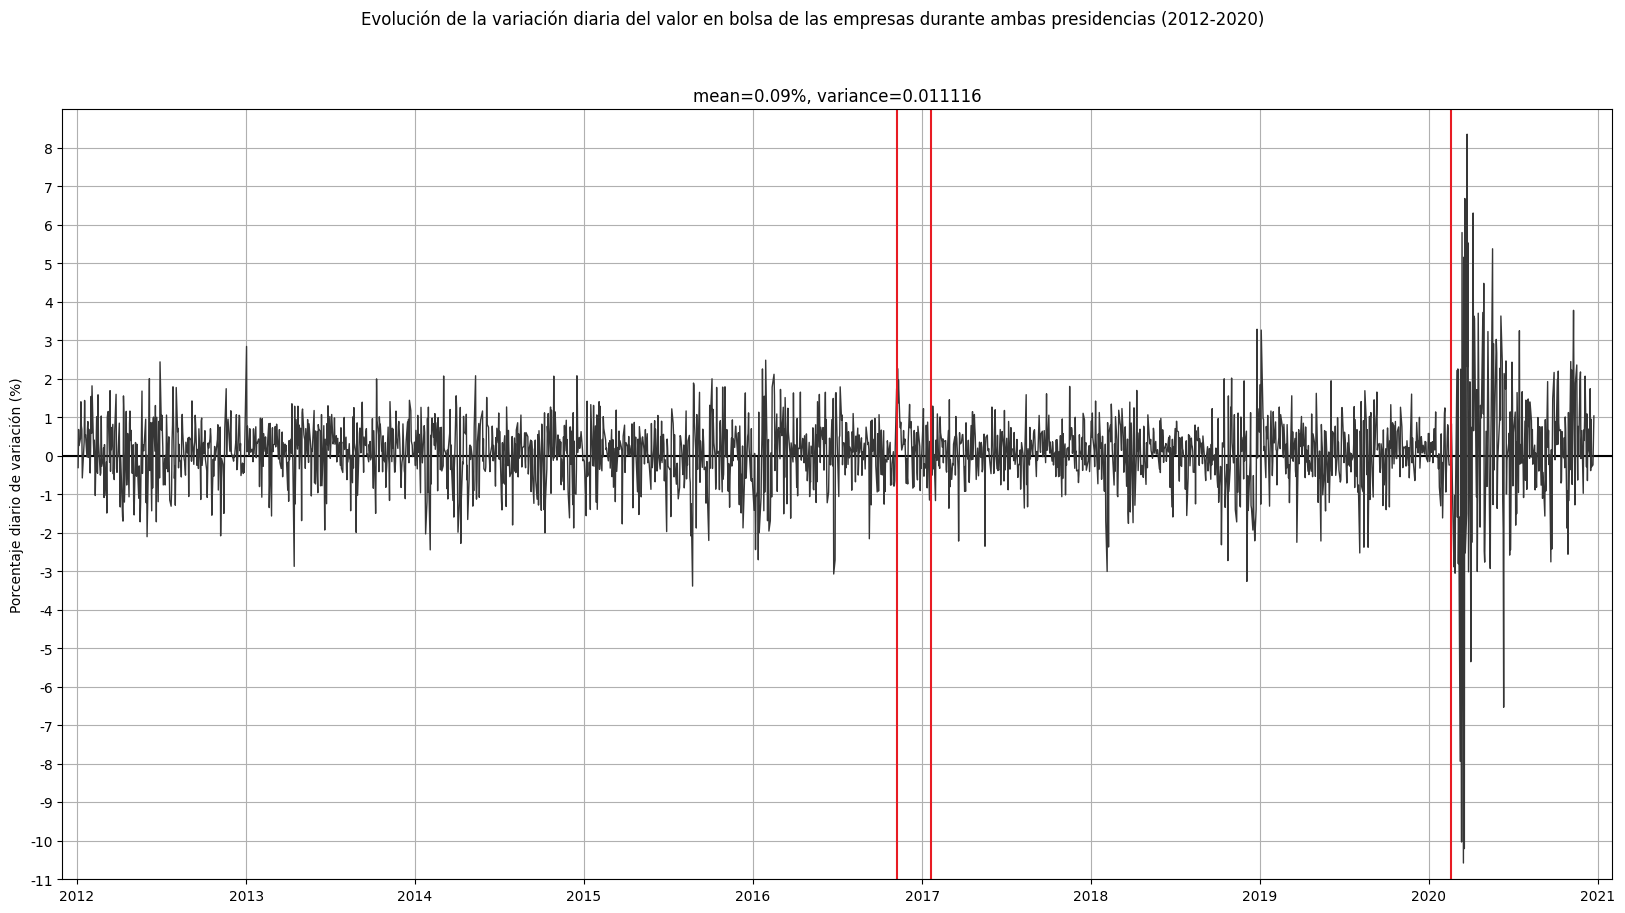

In [124]:
x = df_vars_pct_plot["Date"]
y = df_vars_pct_plot["value"]
media = round(y.mean()*100, 4)
varianza = round(np.var(y)*100, 6)
plt.figure(figsize=figs_size)
plt.suptitle("Evolución de la variación diaria del valor en bolsa de las empresas durante ambas presidencias (2012-2020)")
plt.title(f"mean={media}%, variance={varianza}")
plt.hlines(0, pd.Timestamp("2011-12-01").date(), pd.Timestamp("2021-02-01").date(), color="black")
plt.plot(df_vars_pct_plot["Date"], df_vars_pct_plot["value"], color="#363636", linewidth=1)
plt.vlines(pd.Timestamp("2016-11-08").date(), *pcts_ylim, color="#E81B23")
plt.vlines(pd.Timestamp("2017-01-20").date(), *pcts_ylim, color="#E81B23")
plt.vlines(pd.Timestamp("2020-02-19").date(), *pcts_ylim, color="#E81B23")
plt.yticks(np.arange(*pcts_ylim, step=0.01), np.arange(-11, 9, step=1))
plt.ylim(pcts_ylim)
plt.xlim(pd.Timestamp("2011-12-01").date(), pd.Timestamp("2021-02-01").date())
plt.ylabel("Porcentaje diario de variación (%)")
plt.grid()
plt.savefig("plot_evolucion_bolsa_porcentaje.png")
medias_y_varianzas_dict["Total"].extend([media, varianza])

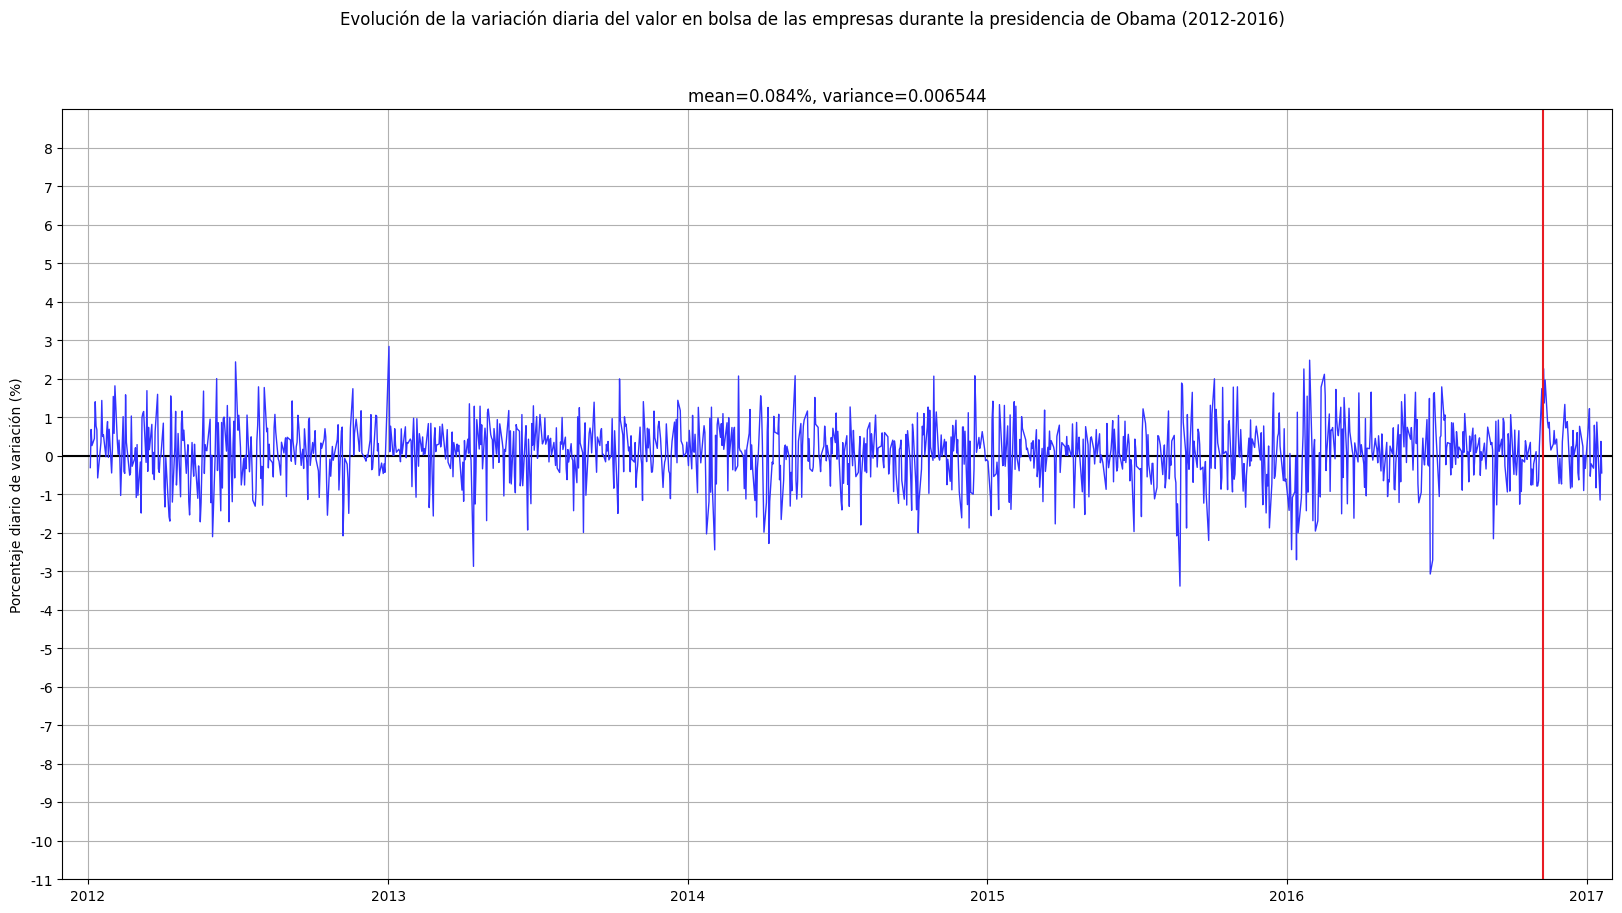

In [125]:
x = bolsa_obama_pct["Date"]
y = bolsa_obama_pct["value"]
media = round(y.mean()*100, 4)
varianza = round(np.var(y)*100, 6)
plt.figure(figsize=figs_size)
plt.suptitle("Evolución de la variación diaria del valor en bolsa de las empresas durante la presidencia de Obama (2012-2016)")
plt.title(f"mean={media}%, variance={varianza}")
plt.hlines(0, pd.Timestamp("2011-12-01").date(), pd.Timestamp("2017-02-01").date(), color="black")
plt.plot(bolsa_obama_pct["Date"], bolsa_obama_pct["value"], color="#3333FF", linewidth=1)
plt.vlines(pd.Timestamp("2016-11-08").date(), *pcts_ylim, color="#E81B23")
plt.yticks(np.arange(*pcts_ylim, step=0.01), np.arange(-11, 9, step=1))
plt.xlim(pd.Timestamp("2011-12-01").date(), pd.Timestamp("2017-02-01").date())
plt.ylim(pcts_ylim)
plt.ylabel("Porcentaje diario de variación (%)")
plt.grid()
plt.savefig("plot_evolucion_bolsa_obama_porcentaje.png")
medias_y_varianzas_dict["Obama"].extend([media, varianza])

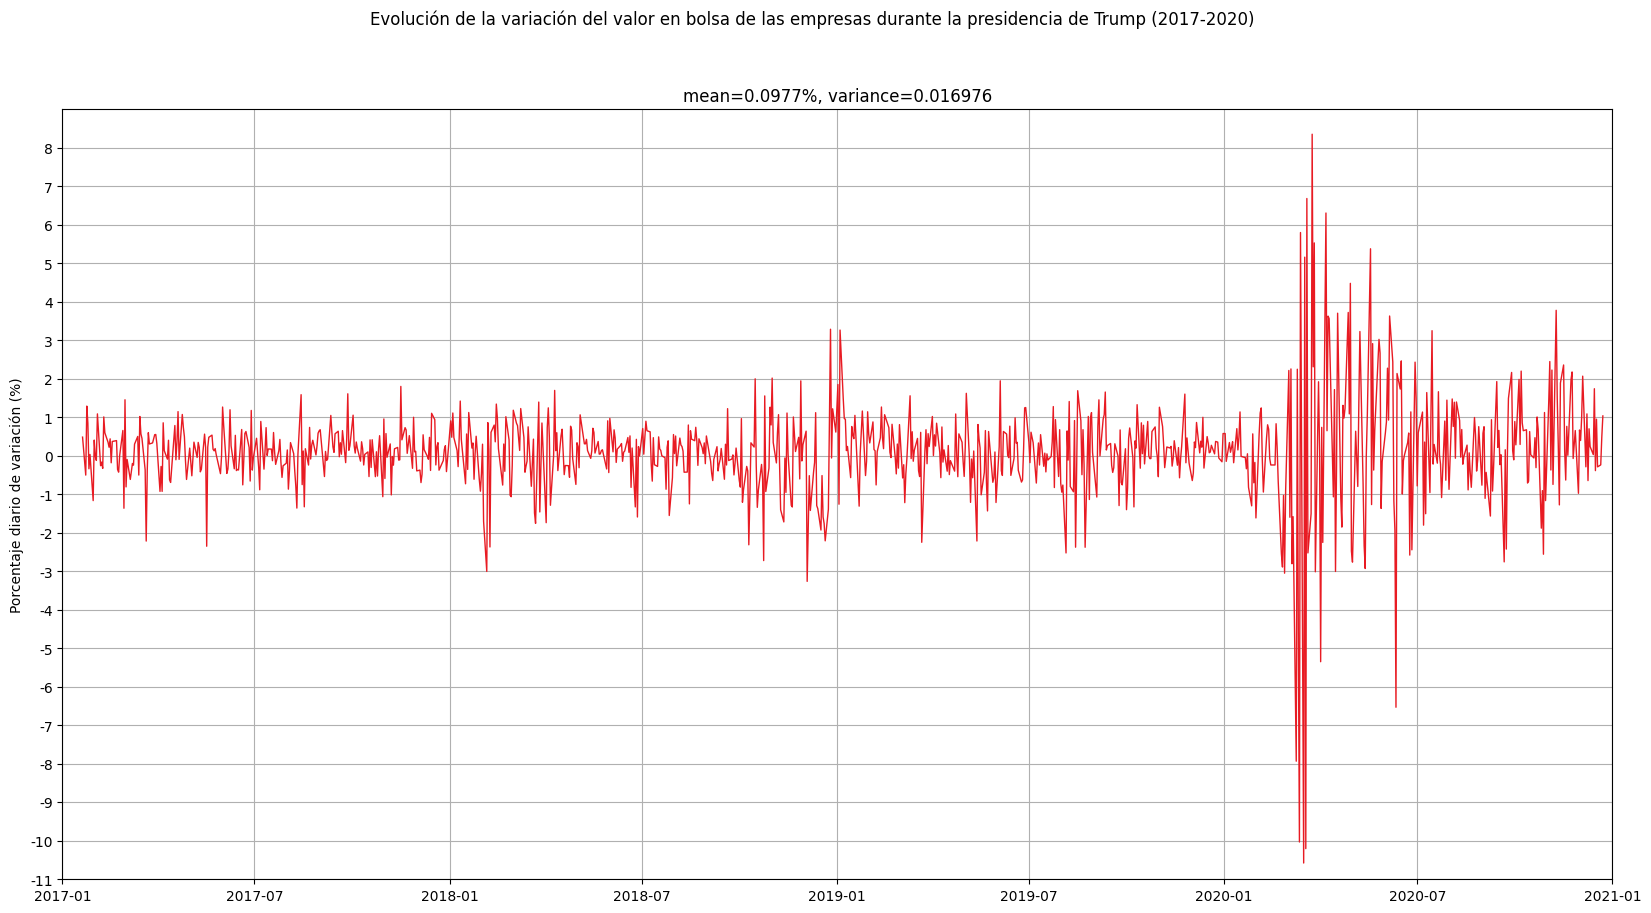

In [126]:
x = bolsa_trump_pct["Date"]
y = bolsa_trump_pct["value"]
media = round(y.mean()*100, 4)
varianza = round(np.var(y)*100, 6)
plt.figure(figsize=figs_size)
plt.suptitle("Evolución de la variación del valor en bolsa de las empresas durante la presidencia de Trump (2017-2020)")
plt.title(f"mean={media}%, variance={varianza}")
plt.plot(bolsa_trump_pct["Date"], bolsa_trump_pct["value"], color="#E81B23", linewidth=1)
plt.yticks(np.arange(*pcts_ylim, step=0.01), np.arange(-11, 9, step=1))
plt.xlim(pd.Timestamp("2017-01-01").date(), pd.Timestamp("2021-01-01").date())
plt.ylim(pcts_ylim)
plt.ylabel("Porcentaje diario de variación (%)")
plt.grid()
plt.savefig("plot_evolucion_bolsa_trump_porcentaje.png")
medias_y_varianzas_dict["Trump"].extend([media, varianza])

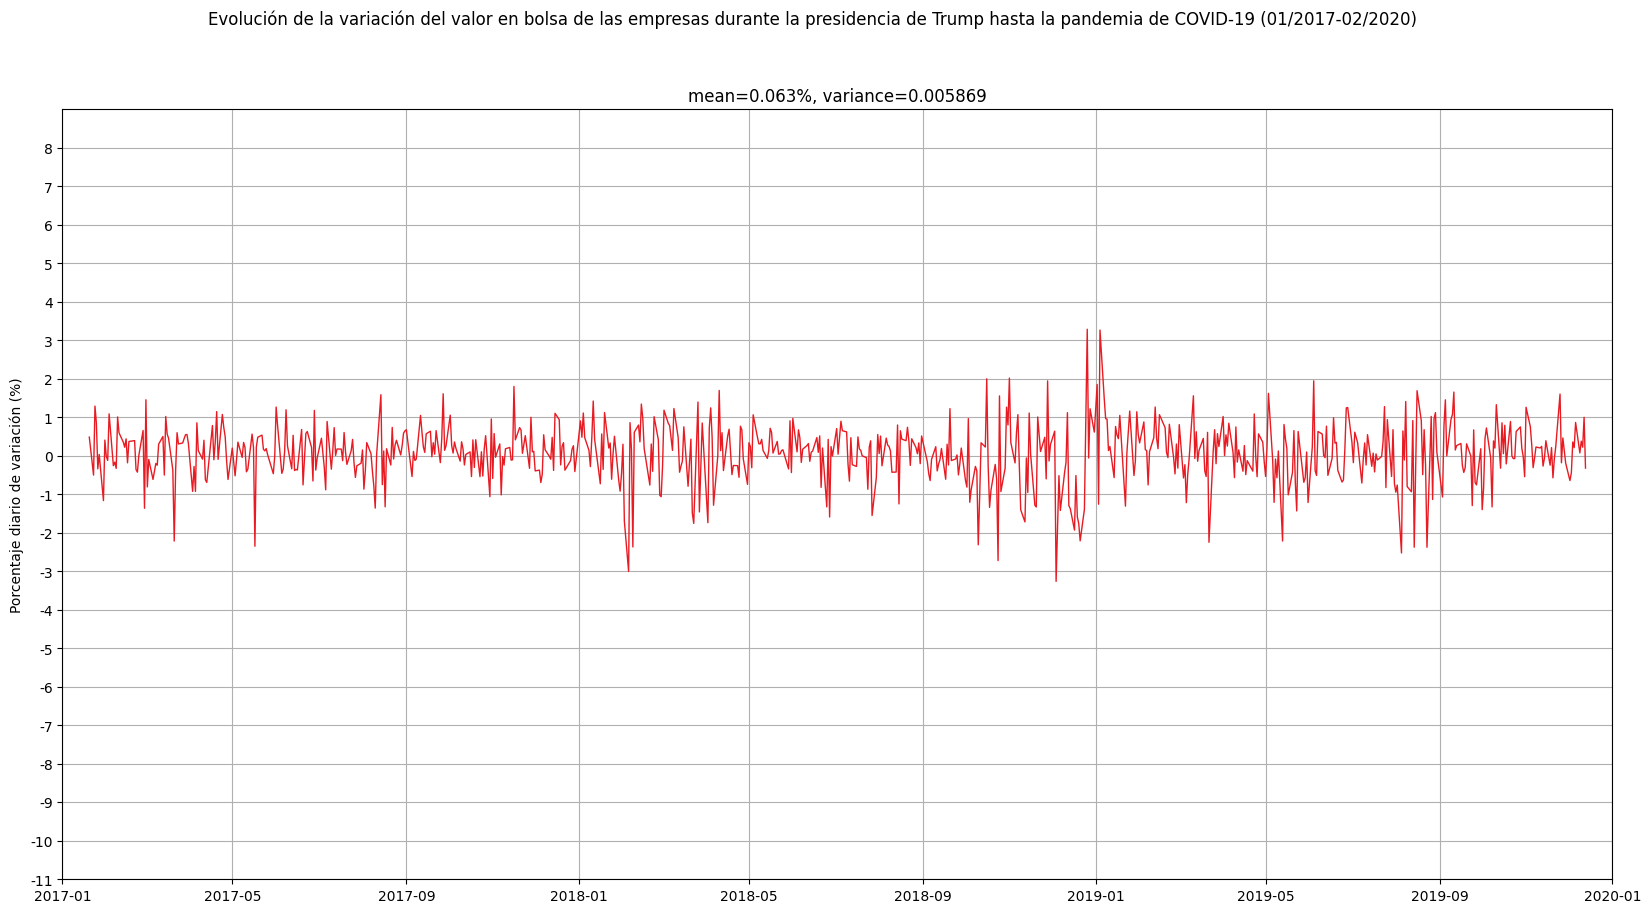

In [127]:
x = bolsa_trump_pct["Date"][bolsa_trump_pct['Date'].dt.date<=pd.Timestamp("2019-12-13").date()]
y = bolsa_trump_pct["value"][bolsa_trump_pct['Date'].dt.date<=pd.Timestamp("2019-12-13").date()]
media = round(y.mean()*100, 4)
varianza = round(np.var(y)*100, 6)
plt.figure(figsize=figs_size)
plt.suptitle("Evolución de la variación del valor en bolsa de las empresas durante la presidencia de Trump hasta la pandemia de COVID-19 (01/2017-02/2020)")
plt.title(f"mean={media}%, variance={varianza}")
plt.plot(x, y, color="#E81B23", linewidth=1)
plt.yticks(np.arange(*pcts_ylim, step=0.01), np.arange(-11, 9, step=1))
plt.xlim(pd.Timestamp("2017-01-01").date(), pd.Timestamp("2020-01-01").date())
plt.ylim(pcts_ylim)
plt.ylabel("Porcentaje diario de variación (%)")
plt.grid()
plt.savefig("plot_evolucion_bolsa_trump_porcentaje_sin_covid.png")
medias_y_varianzas_dict["Trump sin COVID"].extend([media, varianza])

In [128]:
medias_y_varianzas_df = pd.DataFrame(medias_y_varianzas_dict, index=["media", "varianza"])
medias_y_varianzas_df

,Total,Obama,Trump,Trump sin COVID
media,0.090000,0.084000,0.097700,0.063000
varianza,0.011116,0.006544,0.016976,0.005869


In [129]:
from scipy.stats import ttest_ind
t_stat, p_valor = ttest_ind(bolsa_trump_pct["value"], bolsa_obama_pct["value"], equal_var=False)
print("Comparación periodo Obama y periodo Trump:")
print(f"Estadístico t: {t_stat}")
print(f"p-valor: {p_valor}")

if p_valor < 0.05:
    print("Hay una diferencia significativa entre las medias.")
else:
    print("No hay evidencia suficiente para afirmar una diferencia significativa entre las medias.")

print("")
    
t_stat, p_valor = ttest_ind(bolsa_trump_pct["value"][bolsa_trump_pct['Date'].dt.date<=pd.Timestamp("2019-12-13").date()], bolsa_obama_pct["value"], equal_var=False)
print("Comparación periodo Obama y periodo Trump sin COVID:")
print(f"Estadístico t: {t_stat}")
print(f"p-valor: {p_valor}")
if p_valor < 0.05:
    print("Hay una diferencia significativa entre las medias.")
else:
    print("No hay evidencia suficiente para afirmar una diferencia significativa entre las medias.")

Comparación periodo Obama y periodo Trump:
Estadístico t: 0.2891858242785374
p-valor: 0.7724775327934765
No hay evidencia suficiente para afirmar una diferencia significativa entre las medias.

Comparación periodo Obama y periodo Trump sin COVID:
Estadístico t: -0.5790189866825336
p-valor: 0.56265834607426
No hay evidencia suficiente para afirmar una diferencia significativa entre las medias.
